In [103]:
# 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler


In [104]:

# 2
df = pd.read_csv("../campeonato-brasileiro-full.csv")


In [105]:

# 3
df.head()


,ID,rodada,data,hora,dia,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_placar,visitante_placar,mandante_estado,visitante_estado,estado_vencedor
0,1,1,2003-03-29,16:00,Sabado,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,brinco de ouro,4,2,SP,RJ,SP
1,2,1,2003-03-29,16:00,Sabado,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,arena da baixada,2,0,PR,RS,PR
2,3,1,2003-03-30,16:00,Domingo,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,maracana,1,1,RJ,PR,-
3,4,1,2003-03-30,16:00,Domingo,Goias,Paysandu,NaN,NaN,NaN,NaN,-,serra dourada,2,2,GO,PA,-
4,5,1,2003-03-30,16:00,Domingo,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,beira rio,1,1,RS,SP,-


In [106]:

# 4
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7645 entries, 0 to 7644
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  7645 non-null   int64 
 1   rodada              7645 non-null   int64 
 2   data                7645 non-null   object
 3   hora                7645 non-null   object
 4   dia                 7645 non-null   object
 5   mandante            7645 non-null   object
 6   visitante           7645 non-null   object
 7   formacao_mandante   2671 non-null   object
 8   formacao_visitante  2671 non-null   object
 9   tecnico_mandante    3035 non-null   object
 10  tecnico_visitante   3035 non-null   object
 11  vencedor            7645 non-null   object
 12  arena               7645 non-null   object
 13  mandante_placar     7645 non-null   int64 
 14  visitante_placar    7645 non-null   int64 
 15  mandante_estado     7645 non-null   object
 16  visitante_estado    7645

ID                       0
rodada                   0
data                     0
hora                     0
dia                      0
mandante                 0
visitante                0
formacao_mandante     4974
formacao_visitante    4974
tecnico_mandante      4610
tecnico_visitante     4610
vencedor                 0
arena                    0
mandante_placar          0
visitante_placar         0
mandante_estado          0
visitante_estado         0
estado_vencedor          0
dtype: int64

In [107]:

# 5
df.describe(include="all")


,ID,rodada,data,hora,dia,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_placar,visitante_placar,mandante_estado,visitante_estado,estado_vencedor
count,7645.000000,7645.000000,7645,7645,7645,7645,7645,2671,2671,3035,3035,7645,7645,7645.000000,7645.000000,7645,7645,7645
unique,NaN,NaN,1711,176,7,45,45,21,20,178,178,46,152,NaN,NaN,15,15,16
top,NaN,NaN,2021-11-11,16:00,Domingo,Fluminense,Flamengo,4-2-3-1,4-2-3-1,L. Venker de Menezes,L. Venker de Menezes,-,maracana,NaN,NaN,SP,SP,-
freq,NaN,NaN,27,1808,3561,371,372,1600,1525,100,100,2015,562,NaN,NaN,1907,1907,2015
mean,3823.000000,20.196207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.554088,1.027338,NaN,NaN,NaN
std,2207.065737,11.489249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.234262,1.030366,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,1912.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN
50%,3823.000000,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN
75%,5734.000000,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN


In [108]:

# 6
df.isnull().sum()


ID                       0
rodada                   0
data                     0
hora                     0
dia                      0
mandante                 0
visitante                0
formacao_mandante     4974
formacao_visitante    4974
tecnico_mandante      4610
tecnico_visitante     4610
vencedor                 0
arena                    0
mandante_placar          0
visitante_placar         0
mandante_estado          0
visitante_estado         0
estado_vencedor          0
dtype: int64

In [109]:

# 7
df.fillna({"mandante_placar": df["mandante_placar"].median(),
           "visitante_placar": df["visitante_placar"].median()}, inplace=True)


In [110]:

# 8
z_mandante = stats.zscore(df["mandante_placar"])
z_visitante = stats.zscore(df["visitante_placar"])

outliers = df[(abs(z_mandante) > 3) | (abs(z_visitante) > 3)]
print(outliers)


        ID  rodada        data   hora            dia     mandante  \
23      24       2  2003-04-06  18:00        Domingo        Vasco   
27      40       3  2003-04-12  18:00         Sabado  Corinthians   
65      66       6  2003-04-27  16:00        Domingo        Goias   
125    126      11  2003-06-01  16:00        Domingo       Parana   
270    271      23  2003-08-03  16:00        Domingo     Paysandu   
...    ...     ...         ...    ...            ...          ...   
7040  7041      16  2020-10-14  21:30   Quarta-feira        Sport   
7049  7050      17  2020-10-18  16:01        Domingo  Corinthians   
7189  7190      31  2021-01-20  21:30   Quarta-feira    Sao Paulo   
7228  7229      35  2021-02-08  20:00  Segunda-feira  Botafogo-RJ   
7381  7382      12  2021-07-18  18:13        Domingo        Bahia   

          visitante formacao_mandante formacao_visitante   tecnico_mandante  \
23            Goias               NaN                NaN                NaN   
27         Pa

In [111]:

# 9
df = df[(abs(z_mandante) <= 3) & (abs(z_visitante) <= 3)]


In [112]:

# 10
scaler = MinMaxScaler()
df["mandante_placar_norm"] = scaler.fit_transform(df[["mandante_placar"]])


In [113]:

# 11
df = pd.get_dummies(df, columns=["mandante_estado", "visitante_estado", "vencedor"])


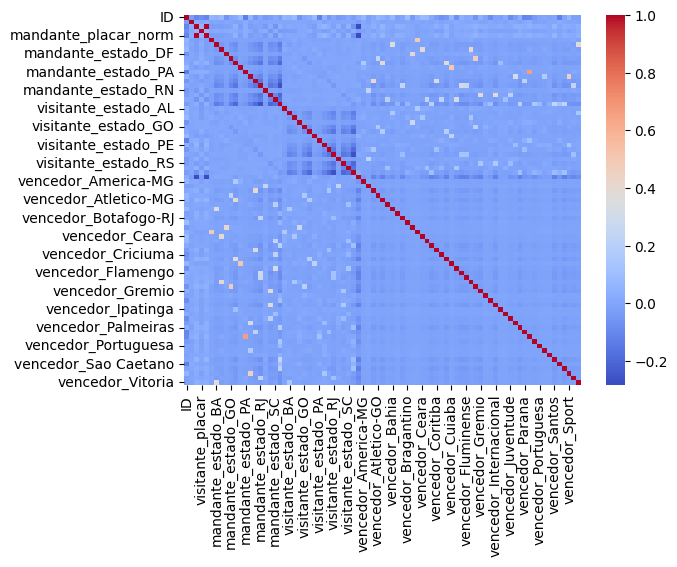

In [114]:

# 12
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.show()


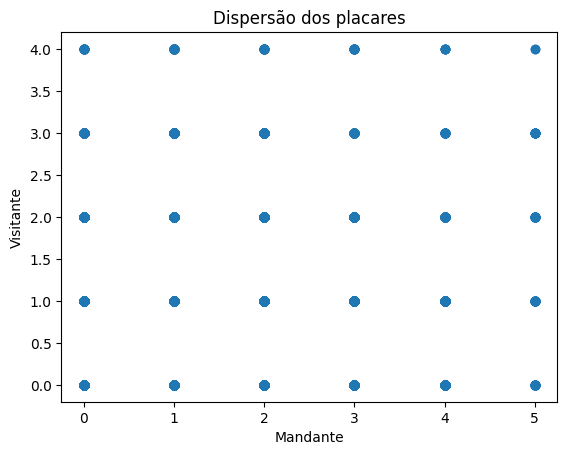

In [115]:

# 13
plt.scatter(df["mandante_placar"], df["visitante_placar"])
plt.xlabel("Mandante")
plt.ylabel("Visitante")
plt.title("Dispersão dos placares")
plt.show()


In [116]:

# 14
flamengo_mandante = df[df["mandante"] == "Flamengo"]


In [117]:

# 15
df.to_csv("campeonato-brasileiro-processado.csv", index=False)


In [118]:

# 16
df["data"] = pd.to_datetime(df["data"])
df["ano"] = pd.to_datetime(df["data"]).dt.year
df["mes"] = pd.to_datetime(df["data"]).dt.month


In [119]:

# 17
vitorias_por_time = df.filter(like="vencedor_").sum()


In [120]:

# 18
df["dif_gols"] = df["mandante_placar"] - df["visitante_placar"]


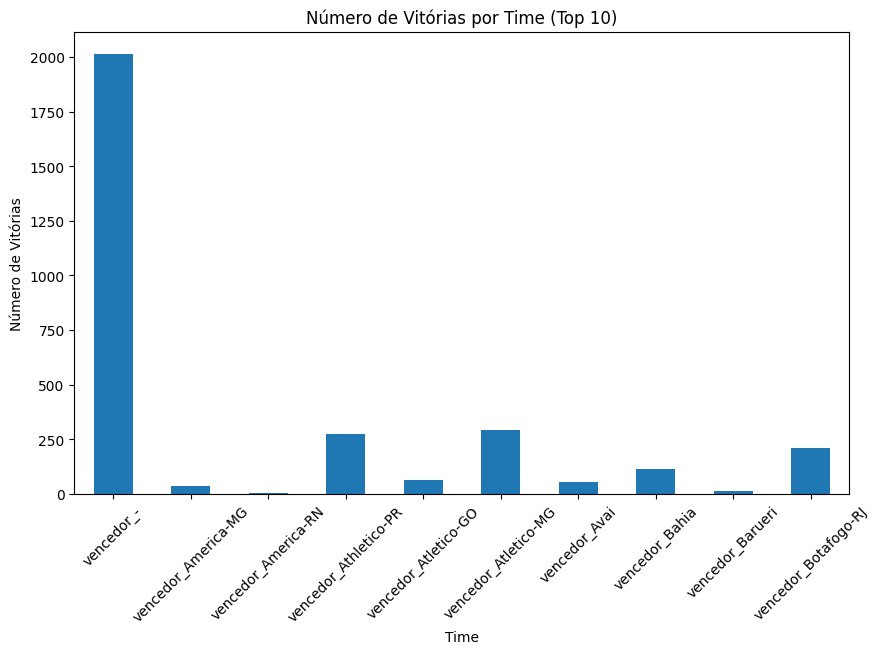

In [121]:

# 19
vitorias_por_time.head(10).plot(kind='bar', figsize=(10, 6))
plt.title("Número de Vitórias por Time (Top 10)")
plt.xlabel("Time")
plt.ylabel("Número de Vitórias")
plt.xticks(rotation=45)
plt.show()


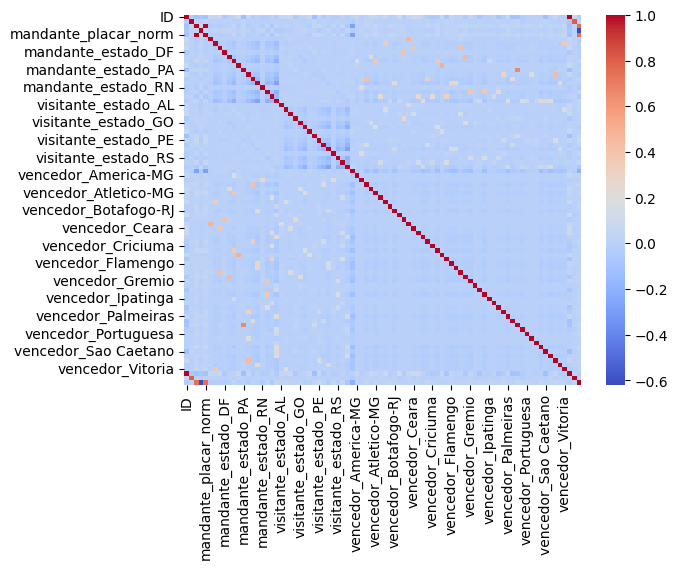

In [122]:

# 20
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.show()
